# **Chapter 6**
## *Working with Date and Time in Python*, 

This chapter takes a practical and intuitive approach to an intimidating topic. You will learn how to deal with the complexity of dates and time in your time series data. The chapter illustrates practical use cases for handling time zones, custom holidays, and business days, working with Unix epoch and UTC. Typically, this intimidating topic is presented in a fun and practical way that you will find helpful to apply right away.

Here is the list of the recipes that we will cover in this chapter:

* Working with `DatetimeIndex`
* Providing a format argument to DateTime
* Working with Unix epoch timestamps
* Working with time deltas
* Converting DateTime with time zone information
* Working with date offsets
* Working with custom business days

# Technical Requirements 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
pd.__version__

'2.0.0'

# Recipe 1: Working with `DatetimeIndex`
* In this recipe, you will explore Python's datetime module and learn about the Timestamp and DatetimeIndex classes and the relationship between them.

#### Python's `Datetime`, pandas `Timestamp`, and `panda.to_datetime()`

In [4]:
dt.datetime

datetime.datetime

In [5]:
dt1 = dt.datetime(2021,1,1)
dt2 = pd.Timestamp('2021-1-1')
dt3 = pd.to_datetime('2021-1-1')

In [6]:
dt4 = pd.DatetimeIndex(['2021-1-1'])

In [7]:
print(dt4)

DatetimeIndex(['2021-01-01'], dtype='datetime64[ns]', freq=None)


In [8]:
print(dt1)
print(dt2)
print(dt3)

2021-01-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00


In [9]:
print(type(dt1))
print(type(dt2))
print(type(dt3))
print(type(dt4))

<class 'datetime.datetime'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [10]:
dt1 == dt2 == dt3

True

In [11]:
dt.datetime(2021,1,1) == pd.to_datetime('2021-1-1')

True

In [12]:
isinstance(dt2, dt.datetime)

True

In [13]:
isinstance(dt2, pd.Timestamp)

True

In [14]:
isinstance(dt1, pd.Timestamp)

False

In [15]:
isinstance(dt4[0], dt.datetime)

True

In [16]:
isinstance(dt4, pd.DatetimeIndex)

True

In [17]:
isinstance(pd.DatetimeIndex, dt.datetime)

False

In [18]:
issubclass(pd.Timestamp, dt.datetime)
# isinstance(dt1, pd.Timestamp)

True

####  `pandas.to_datetime()`

In [19]:
dates = ['2021-1-1', '2021-1-2']
pd_dates = pd.to_datetime(dates)
print(pd_dates)
print(type(pd_dates))

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [20]:
isinstance(pd_dates[0], pd.Timestamp)

True

In [21]:
print(pd_dates[0])
print(type(pd_dates[0]))

2021-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [22]:
dates = [
    '2021-01-01',  # date str format %Y-%m-%d
    '2/1/2021',  # date str format %m/%d/%Y
    '03-01-2021',  # date  str format %m-%d-%Y
    'April 1, 2021',  # date  str format %B %d, %Y
    '20210501',  # date str format %Y%m%d
    np.datetime64('2021-07-01'),  # numpy datetime64
    dt.datetime(2021, 8, 1),  # python datetime
    pd.Timestamp(2021, 9, 1)  # pandas Timestamp
]

In [23]:
parsed_dates = pd.to_datetime(dates, errors='coerce')
print(parsed_dates)

DatetimeIndex(['2021-01-01',        'NaT',        'NaT',        'NaT',
                      'NaT', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


In [24]:
pd.DatetimeIndex(dates)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)

In [25]:
pd.DatetimeIndex(dates) == parsed_dates

array([ True, False, False, False, False,  True,  True,  True])

In [26]:
parsed_dates = pd.DatetimeIndex(dates)
parsed_dates

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)

In [27]:
print(f'Name of Day : {parsed_dates.day_name()}')
print(f'Month : {parsed_dates.month}')
print(f'Year : {parsed_dates.year}')
print(f'Days in Month : {parsed_dates.days_in_month}')
print(f'Quarter {parsed_dates.quarter}')
print(f'Quarter Start : {parsed_dates.is_quarter_start}')
print(f'Leap Year : {parsed_dates.is_leap_year}')
print(f'Month Start : {parsed_dates.is_month_start}')
print(f'Month End : {parsed_dates.is_month_end}')
print(f'Year Start : {parsed_dates.is_year_start}')

Name of Day : Index(['Friday', 'Monday', 'Monday', 'Thursday', 'Saturday', 'Thursday',
       'Sunday', 'Wednesday'],
      dtype='object')
Month : Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int32')
Year : Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], dtype='int32')
Days in Month : Index([31, 28, 31, 30, 31, 31, 31, 30], dtype='int32')
Quarter Index([1, 1, 1, 2, 2, 3, 3, 3], dtype='int32')
Quarter Start : [ True False False  True False  True False False]
Leap Year : [False False False False False False False False]
Month Start : [ True  True  True  True  True  True  True  True]
Month End : [False False False False False False False False]
Year Start : [ True False False False False False False False]


## How it works

In [28]:
example = pd.to_datetime(['something 2021', 'Jan 1, 2021'], errors='ignore')
example

Index(['something 2021', 'Jan 1, 2021'], dtype='object')

In [29]:
len(example)

2

In [30]:
type(example)

pandas.core.indexes.base.Index

## There is more

In [31]:
pd.date_range(start='2021-01-01', periods=3, freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range(start='2021-01-01',
              end='2021-01-03',
              freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range(start='2021-01-01', periods=3)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [34]:
# Example of error

# pd.date_range(start='2021-01-01',
#                freq='D')

# Recipe 2: Providing a format argument to DateTime

In [35]:
import pandas as pd
import datetime as dt

In [36]:
dt.datetime.strptime('1/1/2022', '%m/%d/%Y')

datetime.datetime(2022, 1, 1, 0, 0)

Using Python `datetime.strptime()`

In [37]:
dt.datetime.strptime('1/1/2022', '%m/%d/%Y').date()

datetime.date(2022, 1, 1)

In [38]:
dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date()

datetime.date(2022, 1, 1)

In [39]:
dt.datetime.strptime('1-Jan-2022', '%d-%b-%Y').date()

datetime.date(2022, 1, 1)

In [40]:
dt.datetime.strptime('Saturday, January 1, 2022', '%A, %B %d, %Y').date()

datetime.date(2022, 1, 1)

In [41]:
dt_1 = dt.datetime.strptime('1/1/2022', '%m/%d/%Y')
dt_1.__str__()
str(dt_1)

'2022-01-01 00:00:00'

In [42]:
print(dt_1)

2022-01-01 00:00:00


Using `pandas.to_datetime()`

In [43]:
pd.to_datetime('1/1/2022', format='%m/%d/%Y')

Timestamp('2022-01-01 00:00:00')

In [44]:
pd.to_datetime('1 January, 2022', format='%d %B, %Y')

Timestamp('2022-01-01 00:00:00')

In [45]:
pd.to_datetime('1-Jan-2022', format='%d-%b-%Y')

Timestamp('2022-01-01 00:00:00')

In [46]:
pd.to_datetime('Saturday, January 1, 2022', format='%A, %B %d, %Y')

Timestamp('2022-01-01 00:00:00')

In [47]:
dt_2 = pd.to_datetime('1/1/2022', format='%m/%d/%Y')
print(dt_2)

2022-01-01 00:00:00


In [48]:
pd.to_datetime('1-Jan-2022')

Timestamp('2022-01-01 00:00:00')

In [49]:
pd.to_datetime('Saturday, January 1, 2022')

Timestamp('2022-01-01 00:00:00')

In [50]:
str(dt_2)
dt_2.__str__()

'2022-01-01 00:00:00'

In [51]:
dt_1 == dt_2

True

In [52]:
dt_1.date()

datetime.date(2022, 1, 1)

In [53]:
dt_2.date()

datetime.date(2022, 1, 1)

In [54]:
type(dt_1)
type(dt_2)

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
isinstance(pd.DatetimeIndex, pd.Timestamp)

False

In [56]:
isinstance(dt_1, dt.datetime)

True

In [57]:
isinstance(dt_2, dt.datetime)

True

In [58]:
isinstance(dt_1, pd.Timestamp)

False

In [59]:
isinstance(dt_2, pd.Timestamp)

True

In [60]:
issubclass(pd.Timestamp, dt.datetime)

True

### Using Ignore example

In [61]:
pd.to_datetime(['something 2021', 'Jan 1, 2021'], 
               errors='ignore')

Index(['something 2021', 'Jan 1, 2021'], dtype='object')

### Tranforming a pandas DataFrame to a time series DataFrame

In [62]:
pd.DataFrame({'missing types' : [pd.NaT, pd.NA, np.NaN, None]})

,missing types
0,NaT
1,<NA>
2,NaN
3,None


## There is more

In [63]:
df = pd.DataFrame(
    {'Date': ['January 1, 2022', 'January 2, 2022', 'January 3, 2022'],
     'Sales': [23000, 19020, 21000]})
df

,Date,Sales
0,"January 1, 2022",23000
1,"January 2, 2022",19020
2,"January 3, 2022",21000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
 1   Sales   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-01-01 to 2022-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


# Recipe 3: Working with Unix epoch timestamps

In [66]:
import time
epoch_time = time.time()
print(epoch_time)
print(type(epoch_time))

1681736206.8540452
<class 'float'>


In [67]:
import pandas as pd
t = pd.to_datetime(1635220133.855169, unit='s')
print(t)

2021-10-26 03:48:53.855169024


In [68]:
t = pd.to_datetime(1635220133.855169, unit='s', )

In [69]:
t.tz_localize('UTC').tz_convert('US/Pacific')

Timestamp('2021-10-25 20:48:53.855169024-0700', tz='US/Pacific')

In [70]:
df = pd.DataFrame(
        {'unix_epoch': [1641110340,  1641196740, 1641283140, 1641369540],
         'Sales': [23000, 19020, 21000, 17030]})
df

,unix_epoch,Sales
0,1641110340,23000
1,1641196740,19020
2,1641283140,21000
3,1641369540,17030


In [71]:
df['Date'] = pd.to_datetime(df['unix_epoch'], unit='s')
df['Date'] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
df.set_index('Date', inplace=True)
df

,unix_epoch,Sales
Date,,
2022-01-01 23:59:00-08:00,1641110340,23000
2022-01-02 23:59:00-08:00,1641196740,19020
2022-01-03 23:59:00-08:00,1641283140,21000
2022-01-04 23:59:00-08:00,1641369540,17030


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2022-01-01 23:59:00-08:00 to 2022-01-04 23:59:00-08:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   unix_epoch  4 non-null      int64
 1   Sales       4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


In [73]:
df.index.date

array([datetime.date(2022, 1, 1), datetime.date(2022, 1, 2),
       datetime.date(2022, 1, 3), datetime.date(2022, 1, 4)], dtype=object)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2022-01-01 23:59:00-08:00 to 2022-01-04 23:59:00-08:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   unix_epoch  4 non-null      int64
 1   Sales       4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


In [75]:
df.index

DatetimeIndex(['2022-01-01 23:59:00-08:00', '2022-01-02 23:59:00-08:00',
               '2022-01-03 23:59:00-08:00', '2022-01-04 23:59:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', name='Date', freq=None)

In [76]:
t = pd.to_datetime(1635220133.855169, unit='s', origin='unix')

## There is more 

In [77]:
df = pd.DataFrame(
    {'Date': pd.date_range('01-01-2022', periods=5),
     'order' : range(5)})
df

,Date,order
0,2022-01-01,0
1,2022-01-02,1
2,2022-01-03,2
3,2022-01-04,3
4,2022-01-05,4


In [78]:
example = (df['Date'] -  pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
example

0    1640995200
1    1641081600
2    1641168000
3    1641254400
4    1641340800
Name: Date, dtype: int64

In [79]:
pd.to_datetime(example, unit='s')

0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
Name: Date, dtype: datetime64[ns]

# Recipe 4: Working with Time Deltas

In [80]:
import pandas as pd

In [81]:
df = pd.DataFrame({
    'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
    'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
})
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [82]:
df['expiration_dt'] = df['purchase_dt'] + pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00


In [83]:
df['extended_dt'] = df['purchase_dt'] + \
                pd.Timedelta('35 days 12 hours 30 minutes')
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00


In [84]:
df.iloc[:, 1:] = df.iloc[:, 1:] \
    .apply(lambda x: x.dt.tz_convert('US/Pacific'))
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00


In [85]:
df['exp_ext_diff'] = df['extended_dt'] - df['expiration_dt']
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00,5 days 12:30:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00,5 days 12:30:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00,5 days 12:30:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00,5 days 12:30:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00,5 days 12:30:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00,5 days 12:30:00


In [86]:
df['test'] = pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff,test
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00,5 days 12:30:00,30 days
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00,5 days 12:30:00,30 days
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00,5 days 12:30:00,30 days
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00,5 days 12:30:00,30 days
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00,5 days 12:30:00,30 days
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00,5 days 12:30:00,30 days


In [87]:
tds = pd.to_timedelta(['1 day', '5 days', '10 days 6 hours'])
tds

TimedeltaIndex(['1 days 00:00:00', '5 days 00:00:00', '10 days 06:00:00'], dtype='timedelta64[ns]', freq=None)

In [88]:
pd.to_timedelta(range(5), unit='W')

TimedeltaIndex(['0 days', '7 days', '14 days', '21 days', '28 days'], dtype='timedelta64[ns]', freq=None)

In [89]:
df['purchase_dt']

0   2021-01-01 00:00:00+00:00
1   2021-01-02 00:00:00+00:00
2   2021-01-03 00:00:00+00:00
3   2021-01-04 00:00:00+00:00
4   2021-01-05 00:00:00+00:00
5   2021-01-06 00:00:00+00:00
Name: purchase_dt, dtype: datetime64[ns, UTC]

### Python datetime.timedelta vs pd.Timedelta

In [90]:
import datetime as dt

In [91]:
dt.timedelta(days=1)

datetime.timedelta(days=1)

In [92]:
pd.Timedelta(days=1) == dt.timedelta(days=1)

True

In [93]:
dt_1 = pd.Timedelta(days=1)
dt_2 = dt.timedelta(days=1)
isinstance(pd.Timedelta, dt.timedelta)

False

In [94]:
isinstance(dt_1, dt.timedelta)

True

In [95]:
isinstance(dt_1, pd.Timedelta)

True

In [96]:
issubclass(pd.Timedelta, dt.timedelta)

True

In [97]:
issubclass(dt.timedelta, pd.Timedelta)

False

In [98]:
pd.Timedelta(days = 1, hours = 12)

Timedelta('1 days 12:00:00')

In [99]:
pd.Timedelta('10 U')

Timedelta('0 days 00:00:00.000010')

In [100]:
pd.Timedelta(days=1, hours=12, minutes=55)

Timedelta('1 days 12:55:00')

In [101]:
pd.Timedelta('1 day 12 hours 55 minutes')

Timedelta('1 days 12:55:00')

In [102]:
pd.Timedelta('1D 12H 55T')

Timedelta('1 days 12:55:00')

In [103]:
dt_1.min

Timedelta('-106752 days +00:12:43.145224193')

In [104]:
2 * dt_1

Timedelta('2 days 00:00:00')

In [105]:
week_td = pd.Timedelta('1W')
pd.to_datetime('1 JAN 2022') + week_td

Timestamp('2022-01-08 00:00:00')

In [106]:
pd.to_datetime('1 JAN 2022') + 2 * week_td

Timestamp('2022-01-15 00:00:00')

## There is more

In [107]:
import pandas as pd

df = pd.DataFrame({       
    'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
    'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
})
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   item         6 non-null      object             
 1   purchase_dt  6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 228.0+ bytes


In [109]:
df['1 week'] = pd.Timedelta('1W')

In [110]:
df

,item,purchase_dt,1 week
0,item1,2021-01-01 00:00:00+00:00,7 days
1,item2,2021-01-02 00:00:00+00:00,7 days
2,item3,2021-01-03 00:00:00+00:00,7 days
3,item4,2021-01-04 00:00:00+00:00,7 days
4,item5,2021-01-05 00:00:00+00:00,7 days
5,item6,2021-01-06 00:00:00+00:00,7 days


In [111]:
df['1_week_more'] = df['purchase_dt'] + df['1 week']
df['1_week_less'] = df['purchase_dt'] - df['1 week']
df

,item,purchase_dt,1 week,1_week_more,1_week_less
0,item1,2021-01-01 00:00:00+00:00,7 days,2021-01-08 00:00:00+00:00,2020-12-25 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,7 days,2021-01-09 00:00:00+00:00,2020-12-26 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,7 days,2021-01-10 00:00:00+00:00,2020-12-27 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,7 days,2021-01-11 00:00:00+00:00,2020-12-28 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,7 days,2021-01-12 00:00:00+00:00,2020-12-29 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,7 days,2021-01-13 00:00:00+00:00,2020-12-30 00:00:00+00:00


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   item         6 non-null      object             
 1   purchase_dt  6 non-null      datetime64[ns, UTC]
 2   1 week       6 non-null      timedelta64[ns]    
 3   1_week_more  6 non-null      datetime64[ns, UTC]
 4   1_week_less  6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3), object(1), timedelta64[ns](1)
memory usage: 372.0+ bytes


In [113]:
pd.timedelta_range('1W 2 days', periods=5)

TimedeltaIndex(['9 days', '10 days', '11 days', '12 days', '13 days'], dtype='timedelta64[ns]', freq='D')

In [114]:
df = pd.DataFrame({       
    'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
    'purchase_dt': pd.date_range('2021-01-01', periods=5, freq='D', tz='UTC'),
    'time_deltas': pd.timedelta_range('1W 2 days 6 hours', periods=5)
})

# Recipe 5: Converting Datetime with TimeZone information 

In [115]:
import pandas as pd

In [116]:
df = pd.DataFrame({       
    'Location': [
        'Los Angeles',
        'New York',
        'Berlin', 
        'New Delhi', 
       'Moscow', 
       'Tokyo', 
       'Dubai'],
    'tz': ['US/Pacific', 
       'US/Eastern', 
       'Europe/Berlin', 
       'Asia/Kolkata', 
       'Europe/Moscow', 
       'Asia/Tokyo',
       'Asia/Dubai'],
    'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
}).set_index('visit_dt')
df

,Location,tz
visit_dt,,
2023-04-17 22:00:00,Los Angeles,US/Pacific
2023-04-17 22:45:00,New York,US/Eastern
2023-04-17 23:30:00,Berlin,Europe/Berlin
2023-04-18 00:15:00,New Delhi,Asia/Kolkata
2023-04-18 01:00:00,Moscow,Europe/Moscow
2023-04-18 01:45:00,Tokyo,Asia/Tokyo
2023-04-18 02:30:00,Dubai,Asia/Dubai


In [117]:
df = df.tz_localize('UTC')
df

,Location,tz
visit_dt,,
2023-04-17 22:00:00+00:00,Los Angeles,US/Pacific
2023-04-17 22:45:00+00:00,New York,US/Eastern
2023-04-17 23:30:00+00:00,Berlin,Europe/Berlin
2023-04-18 00:15:00+00:00,New Delhi,Asia/Kolkata
2023-04-18 01:00:00+00:00,Moscow,Europe/Moscow
2023-04-18 01:45:00+00:00,Tokyo,Asia/Tokyo
2023-04-18 02:30:00+00:00,Dubai,Asia/Dubai


In [118]:
df_hq = df.tz_convert('Asia/Tokyo')
df_hq

,Location,tz
visit_dt,,
2023-04-18 07:00:00+09:00,Los Angeles,US/Pacific
2023-04-18 07:45:00+09:00,New York,US/Eastern
2023-04-18 08:30:00+09:00,Berlin,Europe/Berlin
2023-04-18 09:15:00+09:00,New Delhi,Asia/Kolkata
2023-04-18 10:00:00+09:00,Moscow,Europe/Moscow
2023-04-18 10:45:00+09:00,Tokyo,Asia/Tokyo
2023-04-18 11:30:00+09:00,Dubai,Asia/Dubai


In [119]:
df['local_dt'] = df.index
df['local_dt'] = \
    df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)
df

,Location,tz,local_dt
visit_dt,,,
2023-04-17 22:00:00+00:00,Los Angeles,US/Pacific,2023-04-17 15:00:00-07:00
2023-04-17 22:45:00+00:00,New York,US/Eastern,2023-04-17 18:45:00-04:00
2023-04-17 23:30:00+00:00,Berlin,Europe/Berlin,2023-04-18 01:30:00+02:00
2023-04-18 00:15:00+00:00,New Delhi,Asia/Kolkata,2023-04-18 05:45:00+05:30
2023-04-18 01:00:00+00:00,Moscow,Europe/Moscow,2023-04-18 04:00:00+03:00
2023-04-18 01:45:00+00:00,Tokyo,Asia/Tokyo,2023-04-18 10:45:00+09:00
2023-04-18 02:30:00+00:00,Dubai,Asia/Dubai,2023-04-18 06:30:00+04:00


In [120]:
df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)

visit_dt
2023-04-17 22:00:00+00:00    2023-04-17 15:00:00-07:00
2023-04-17 22:45:00+00:00    2023-04-17 18:45:00-04:00
2023-04-17 23:30:00+00:00    2023-04-18 01:30:00+02:00
2023-04-18 00:15:00+00:00    2023-04-18 05:45:00+05:30
2023-04-18 01:00:00+00:00    2023-04-18 04:00:00+03:00
2023-04-18 01:45:00+00:00    2023-04-18 10:45:00+09:00
2023-04-18 02:30:00+00:00    2023-04-18 06:30:00+04:00
dtype: object

In [121]:
pd.to_datetime(df['local_dt'], utc=True)

visit_dt
2023-04-17 22:00:00+00:00   2023-04-17 22:00:00+00:00
2023-04-17 22:45:00+00:00   2023-04-17 22:45:00+00:00
2023-04-17 23:30:00+00:00   2023-04-17 23:30:00+00:00
2023-04-18 00:15:00+00:00   2023-04-18 00:15:00+00:00
2023-04-18 01:00:00+00:00   2023-04-18 01:00:00+00:00
2023-04-18 01:45:00+00:00   2023-04-18 01:45:00+00:00
2023-04-18 02:30:00+00:00   2023-04-18 02:30:00+00:00
Name: local_dt, dtype: datetime64[ns, UTC]

## There is More

In [122]:
df = pd.DataFrame({       
    'Location': ['Los Angeles', 
'New York',
'Berlin', 
'New Delhi', 
'Moscow', 
'Tokyo', 
'Dubai'],
    'tz': ['US/Pacific', 
'US/Eastern', 
'Europe/Berlin', 
'Asia/Kolkata', 
'Europe/Moscow', 
'Asia/Tokyo',
'Asia/Dubai'],
'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
}).set_index('visit_dt').tz_localize('UTC').tz_convert('Asia/Tokyo')
df

,Location,tz
visit_dt,,
2023-04-18 07:00:00+09:00,Los Angeles,US/Pacific
2023-04-18 07:45:00+09:00,New York,US/Eastern
2023-04-18 08:30:00+09:00,Berlin,Europe/Berlin
2023-04-18 09:15:00+09:00,New Delhi,Asia/Kolkata
2023-04-18 10:00:00+09:00,Moscow,Europe/Moscow
2023-04-18 10:45:00+09:00,Tokyo,Asia/Tokyo
2023-04-18 11:30:00+09:00,Dubai,Asia/Dubai


In [123]:
df.index = df.index.strftime('%Y-%m-%d %H:%M %p')
df

,Location,tz
visit_dt,,
2023-04-18 07:00 AM,Los Angeles,US/Pacific
2023-04-18 07:45 AM,New York,US/Eastern
2023-04-18 08:30 AM,Berlin,Europe/Berlin
2023-04-18 09:15 AM,New Delhi,Asia/Kolkata
2023-04-18 10:00 AM,Moscow,Europe/Moscow
2023-04-18 10:45 AM,Tokyo,Asia/Tokyo
2023-04-18 11:30 AM,Dubai,Asia/Dubai


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2023-04-18 07:00 AM to 2023-04-18 11:30 AM
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  7 non-null      object
 1   tz        7 non-null      object
dtypes: object(2)
memory usage: 168.0+ bytes


# Recipe 6: Working with Date Offets

In [125]:
import pandas as pd
import numpy as np

In [126]:
np.random.seed(10)
df = pd.DataFrame({       
    'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
    'production' : np.random.randint(4, 20, 6)
}).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,13
2021-01-02,17
2021-01-03,8
2021-01-04,19
2021-01-05,4
2021-01-06,5


In [127]:
df['day'] = df.index.day_name()
df

,production,day
purchase_dt,,
2021-01-01,13,Friday
2021-01-02,17,Saturday
2021-01-03,8,Sunday
2021-01-04,19,Monday
2021-01-05,4,Tuesday
2021-01-06,5,Wednesday


In [128]:
df.reset_index().groupby(['purchase_dt', 'day']).sum()

,,production
purchase_dt,day,
2021-01-01,Friday,13
2021-01-02,Saturday,17
2021-01-03,Sunday,8
2021-01-04,Monday,19
2021-01-05,Tuesday,4
2021-01-06,Wednesday,5


In [129]:
type(pd.offsets.BDay(0))

pandas._libs.tslibs.offsets.BusinessDay

In [130]:
df['BusinessDay'] = df.index - pd.offsets.BDay(0)
df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,day,BusinessDay,BDay Name
purchase_dt,,,,
2021-01-01,13,Friday,2021-01-01,Friday
2021-01-02,17,Saturday,2021-01-04,Monday
2021-01-03,8,Sunday,2021-01-04,Monday
2021-01-04,19,Monday,2021-01-04,Monday
2021-01-05,4,Tuesday,2021-01-05,Tuesday
2021-01-06,5,Wednesday,2021-01-06,Wednesday


In [131]:
df.groupby(['BusinessDay', 'BDay Name']).sum()

,,production,day
BusinessDay,BDay Name,,
2021-01-01,Friday,13,Friday
2021-01-04,Monday,44,SaturdaySundayMonday
2021-01-05,Tuesday,4,Tuesday
2021-01-06,Wednesday,5,Wednesday


<Axes: xlabel='BusinessDay,BDay Name'>

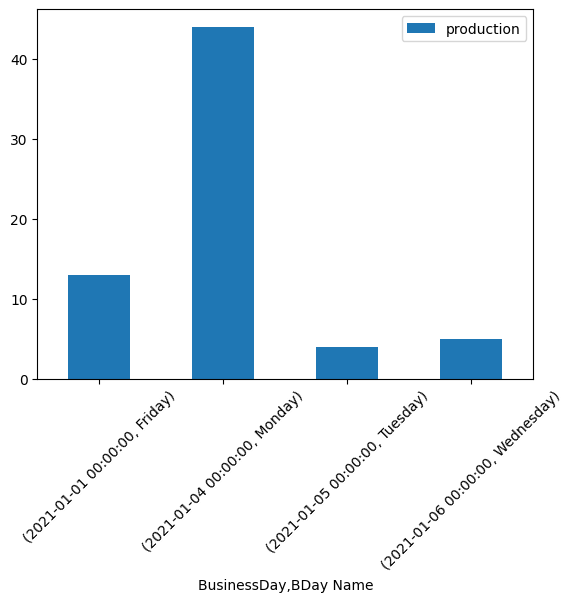

In [132]:
df.groupby(['BusinessDay', 'BDay Name']).sum().plot.bar(rot=45)

In [133]:
np.random.seed(10)
df = pd.DataFrame({       
    'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
    'production' : np.random.randint(4, 20, 6)
}).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,13
2021-01-02,17
2021-01-03,8
2021-01-04,19
2021-01-05,4
2021-01-06,5


In [134]:
df['QuarterEnd'] = df.index + pd.offsets.QuarterEnd(0)
# df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,QuarterEnd
purchase_dt,,
2021-01-01,13,2021-03-31
2021-01-02,17,2021-03-31
2021-01-03,8,2021-03-31
2021-01-04,19,2021-03-31
2021-01-05,4,2021-03-31
2021-01-06,5,2021-03-31


In [135]:
df['MonthEnd'] = df.index + pd.offsets.MonthEnd(0)
# df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,QuarterEnd,MonthEnd
purchase_dt,,,
2021-01-01,13,2021-03-31,2021-01-31
2021-01-02,17,2021-03-31,2021-01-31
2021-01-03,8,2021-03-31,2021-01-31
2021-01-04,19,2021-03-31,2021-01-31
2021-01-05,4,2021-03-31,2021-01-31
2021-01-06,5,2021-03-31,2021-01-31


In [136]:
df['BusinessDay'] = df.index + pd.offsets.BDay(0)
df

,production,QuarterEnd,MonthEnd,BusinessDay
purchase_dt,,,,
2021-01-01,13,2021-03-31,2021-01-31,2021-01-01
2021-01-02,17,2021-03-31,2021-01-31,2021-01-04
2021-01-03,8,2021-03-31,2021-01-31,2021-01-04
2021-01-04,19,2021-03-31,2021-01-31,2021-01-04
2021-01-05,4,2021-03-31,2021-01-31,2021-01-05
2021-01-06,5,2021-03-31,2021-01-31,2021-01-06


## There is More

In [137]:
from pandas.tseries.holiday import (
    USFederalHolidayCalendar
)

df = pd.DataFrame({       
    'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
    'production' : np.random.randint(4, 20, 6)
}).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,15
2021-01-02,16
2021-01-03,13
2021-01-04,17
2021-01-05,4
2021-01-06,17


In [138]:
USFederalHolidayCalendar.rules

[Holiday: New Year's Day (month=1, day=1, observance=<function nearest_workday at 0x7fbe5d86a3e0>),
 Holiday: Birthday of Martin Luther King, Jr. (month=1, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Washington’s Birthday (month=2, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Memorial Day (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>),
 Holiday: Juneteenth National Independence Day (month=6, day=19, observance=<function nearest_workday at 0x7fbe5d86a3e0>),
 Holiday: Independence Day (month=7, day=4, observance=<function nearest_workday at 0x7fbe5d86a3e0>),
 Holiday: Labor Day (month=9, day=1, offset=<DateOffset: weekday=MO(+1)>),
 Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: weekday=MO(+2)>),
 Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x7fbe5d86a3e0>),
 Holiday: Thanksgiving Day (month=11, day=1, offset=<DateOffset: weekday=TH(+4)>),
 Holiday: Christmas Day (month=12, day=25, observance=<function nearest

In [139]:
df['USFederalHolidays'] = df.index + pd.offsets.CDay(calendar=USFederalHolidayCalendar())
df

,production,USFederalHolidays
purchase_dt,,
2021-01-01,15,2021-01-04
2021-01-02,16,2021-01-04
2021-01-03,13,2021-01-04
2021-01-04,17,2021-01-05
2021-01-05,4,2021-01-06
2021-01-06,17,2021-01-07


In [140]:
from pandas.tseries.holiday import Holiday, nearest_workday

In [141]:
Holiday

pandas.tseries.holiday.Holiday

In [142]:
newyears = Holiday("New Years", 
                   month=1, 
                   day=1, 
                   observance=nearest_workday)
newyears

Holiday: New Years (month=1, day=1, observance=<function nearest_workday at 0x7fbe5d86a3e0>)

In [143]:
df['NewYearsHoliday'] = df.index + pd.offsets.CDay(calendar=newyears)
df

,production,USFederalHolidays,NewYearsHoliday
purchase_dt,,,
2021-01-01,15,2021-01-04,2021-01-04
2021-01-02,16,2021-01-04,2021-01-04
2021-01-03,13,2021-01-04,2021-01-04
2021-01-04,17,2021-01-05,2021-01-05
2021-01-05,4,2021-01-06,2021-01-06
2021-01-06,17,2021-01-07,2021-01-07


In [144]:
nearest_workday(pd.to_datetime('2021-1-3'))

Timestamp('2021-01-04 00:00:00')

# Recipe 7: Working with custom business days

In [145]:
import pandas as pd

In [146]:
dubai_uae_workdays = "Sun Mon Tue Wed Thu"

# UAE national day
nationalDay = [pd.to_datetime('2021-12-2')]

dubai_uae_bday = pd.offsets.CDay(
    holidays=nationalDay,
    weekmask=dubai_uae_workdays)

In [147]:
dubai_uae_bday.holidays

(numpy.datetime64('2021-12-02'),)

In [148]:
dubai_uae_bday.weekmask

'Sun Mon Tue Wed Thu'

In [149]:
df = pd.DataFrame({
    'Date': pd.date_range('12-1-2021', periods=10, freq=dubai_uae_bday )})
df

,Date
0,2021-12-01
1,2021-12-05
2,2021-12-06
3,2021-12-07
4,2021-12-08
5,2021-12-09
6,2021-12-12
7,2021-12-13
8,2021-12-14
9,2021-12-15


In [150]:
df['Day_name'] = df.Date.dt.day_name()
df

,Date,Day_name
0,2021-12-01,Wednesday
1,2021-12-05,Sunday
2,2021-12-06,Monday
3,2021-12-07,Tuesday
4,2021-12-08,Wednesday
5,2021-12-09,Thursday
6,2021-12-12,Sunday
7,2021-12-13,Monday
8,2021-12-14,Tuesday
9,2021-12-15,Wednesday


### Custom Business Hours

In [151]:
b_hours = pd.offsets.BusinessHour()
b_hours

<BusinessHour: BH=09:00-17:00>

In [152]:
cust_hours = pd.offsets.CustomBusinessHour(
    start="8:30",
    end="15:30",
    holidays=nationalDay,
    weekmask=dubai_uae_workdays)

In [153]:
# df['Date'] = \
#      df['Date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Dubai')

In [154]:
df

,Date,Day_name
0,2021-12-01,Wednesday
1,2021-12-05,Sunday
2,2021-12-06,Monday
3,2021-12-07,Tuesday
4,2021-12-08,Wednesday
5,2021-12-09,Thursday
6,2021-12-12,Sunday
7,2021-12-13,Monday
8,2021-12-14,Tuesday
9,2021-12-15,Wednesday


In [155]:
df['Date'] + cust_hours * 16

0   2021-12-06 10:30:00
1   2021-12-07 10:30:00
2   2021-12-08 10:30:00
3   2021-12-09 10:30:00
4   2021-12-12 10:30:00
5   2021-12-13 10:30:00
6   2021-12-14 10:30:00
7   2021-12-15 10:30:00
8   2021-12-16 10:30:00
9   2021-12-19 10:30:00
Name: Date, dtype: datetime64[ns]